In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from data_cleaning import load_and_clean_data

In [2]:
df = load_and_clean_data('data/heart_disease_data.csv')
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
models = {
    'LogReg': LogisticRegression(max_iter=500),
    'RF': RandomForestClassifier(n_estimators=100),
    'GBT': GradientBoostingClassifier()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'model': model,
        'report': classification_report(y_test, y_pred, output_dict=True),
        'confusion': confusion_matrix(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    }


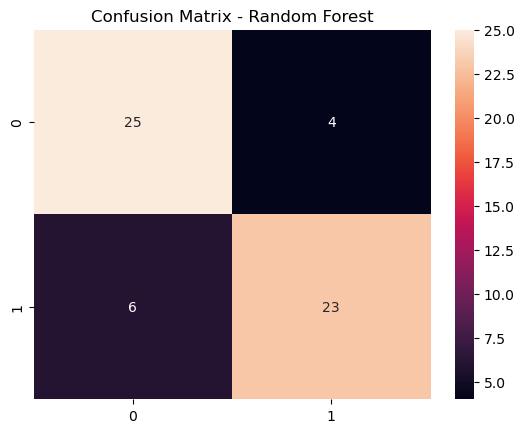

In [4]:
sns.heatmap(results['RF']['confusion'], annot=True, fmt='d')
plt.title("Confusion Matrix - Random Forest")
plt.savefig("screenshots/confusion_matrix_rf.png")
plt.show()

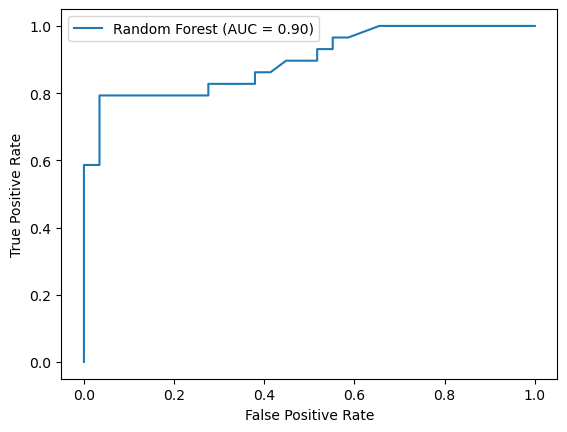

In [5]:
fpr, tpr, _ = roc_curve(y_test, results['RF']['model'].predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label="Random Forest (AUC = {:.2f})".format(results['RF']['roc_auc']))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.savefig("screenshots/roc_curve.png")
plt.show()